In [2]:
# Import Libraries
import numpy as np 
import matplotlib.pyplot as plt 

# Loading the Images

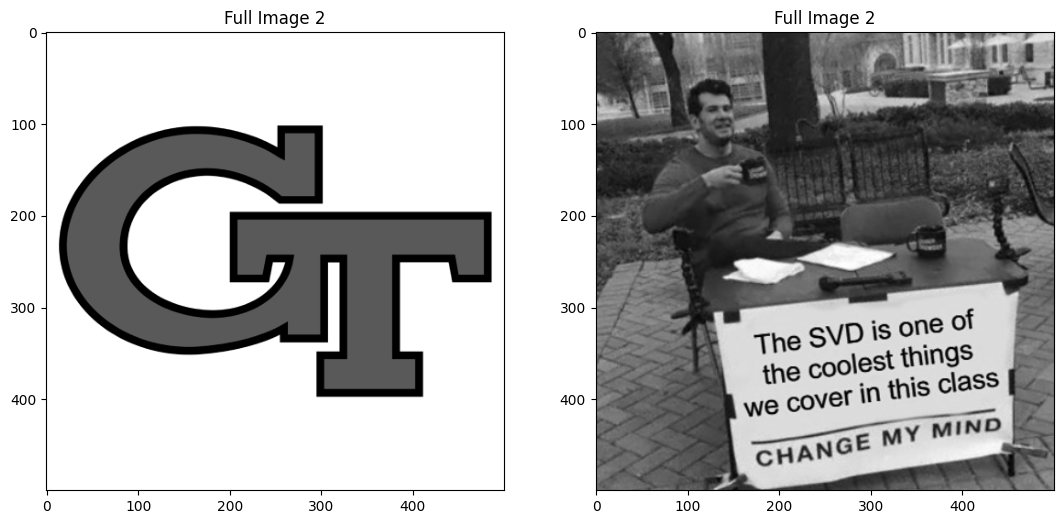

In [3]:
# Defining a function to load in an image from a specified directory 
def load_grayscale_image(path):
    image = plt.imread(path) # reading in the image
    image = np.mean(image[:,:,1:3], axis=2) / np.max(image.ravel()) # averaging the image's color paths to make it gray-scale 
    return image 

# Function to plot two image matrices side by side 
def plot_images(image1, image2, title1, title2):
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    plt.imshow(image1, cmap='gray')
    plt.title(title2)
    plt.subplot(1,2,2)
    plt.title(title2)
    plt.imshow(image2, cmap='gray')

# Loading the two images (which will literally be just 500x500 numpy arrays with values between 0 and 1)
image1 = load_grayscale_image("GTLogo.png")
image2 = load_grayscale_image("SVDImage.png")

# Plotting the images
plot_images(image1, image2, "Full Image 1", "Full Image 2")

# Reconstructing the images with the SVD

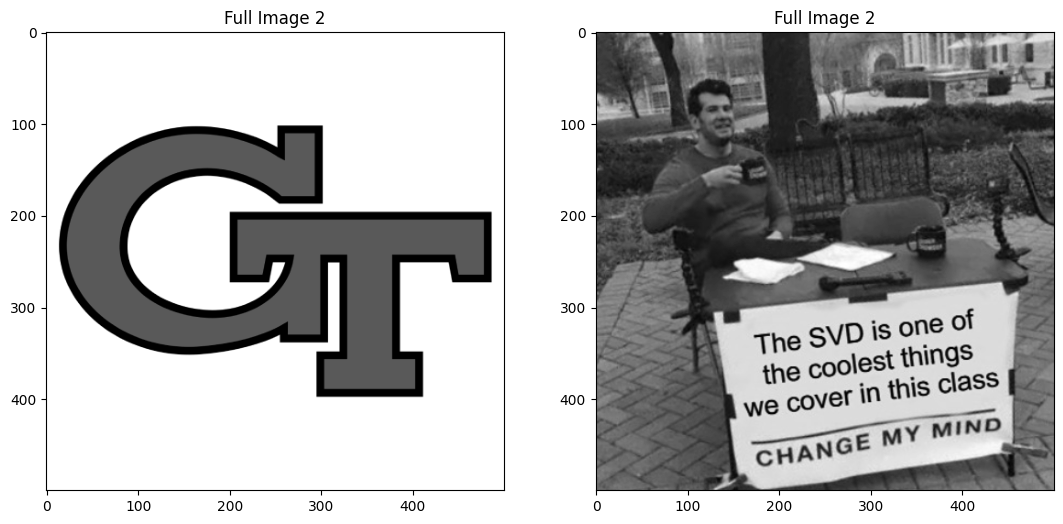

In [4]:
# Defining a function to return the U, S, and V matrices in the form we covered them in math
# Numpy returns the S in vector-form and the V transposed which is really annoying imo 
def nice_svd(A):
    U, S, V = np.linalg.svd(A)
    return U, np.diag(S.ravel()), V.T

# Computing the SVD of the two images
U1, S1, V1 = nice_svd(image1)
U2, S2, V2 = nice_svd(image2)

# Plotting the full SVD reconstruction of the images
plot_images(U1 @ S1 @ V1.T, U2 @ S2 @ V2.T, "Full Image 1", "Full Image 2")

# Recap: Unitary Matrices

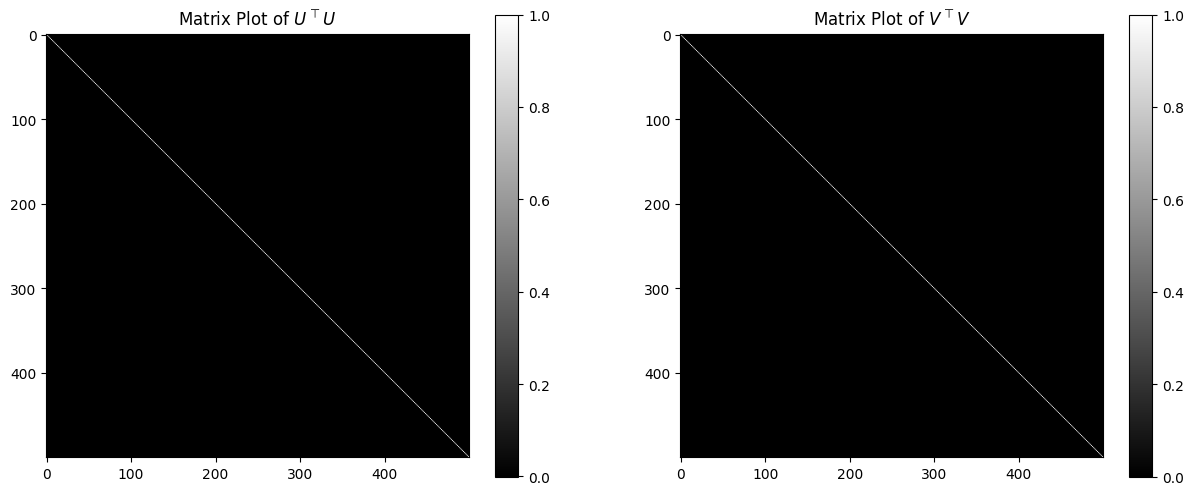

In [5]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Matrix Plot of $U^\\top U$")
# Plotting U.T @ U1 
plt.imshow(U1.T @ U1, cmap='gray')
plt.colorbar()
plt.subplot(1,2,2)
plt.title("Matrix Plot of $V ^\\top V$")
# Plotting V.T @ V 
plt.imshow(V1.T @ V1, cmap='gray')
plt.colorbar()

# Visualizing the Singular Value Decay of the Images

Text(0.5, 0, 'Singular Value Index')

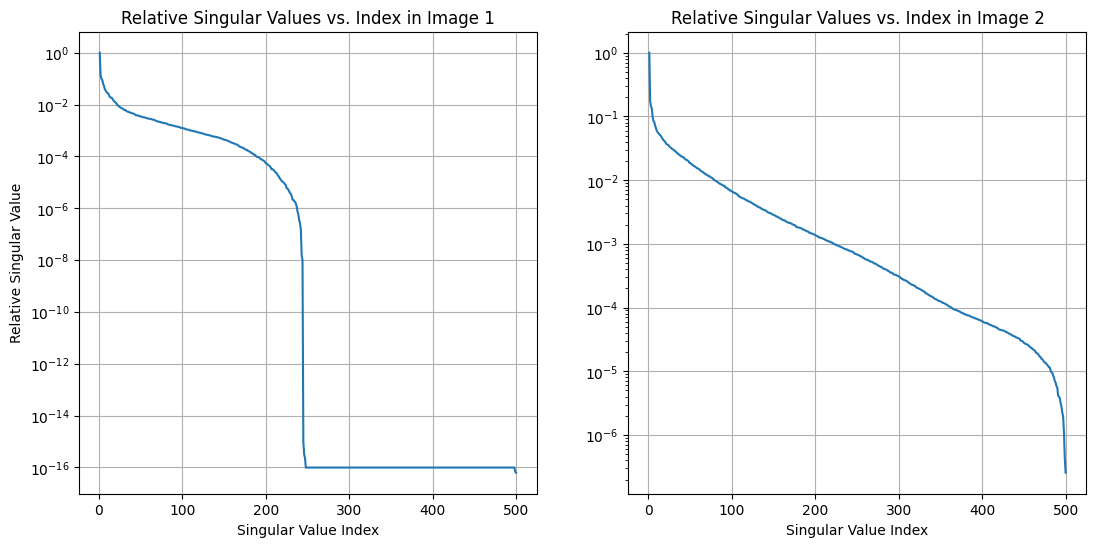

In [6]:
# Creating side-by-side plots of the Relative Singular Values of the two Images
plt.figure(figsize=(13,6))

plt.subplot(1,2,1)
plt.semilogy(range(1, S1.shape[1]+1), np.diag(S1)/S1[0,0])
plt.grid()
plt.title("Relative Singular Values vs. Index in Image 1")
plt.xlabel("Singular Value Index")
plt.ylabel("Relative Singular Value")

plt.subplot(1,2,2)
plt.semilogy(range(1, S2.shape[1]+1), np.diag(S2)/S2[0,0])
plt.grid()
plt.title("Relative Singular Values vs. Index in Image 2")
plt.xlabel("Singular Value Index")

# Compressing the Images by Truncating Singular Values

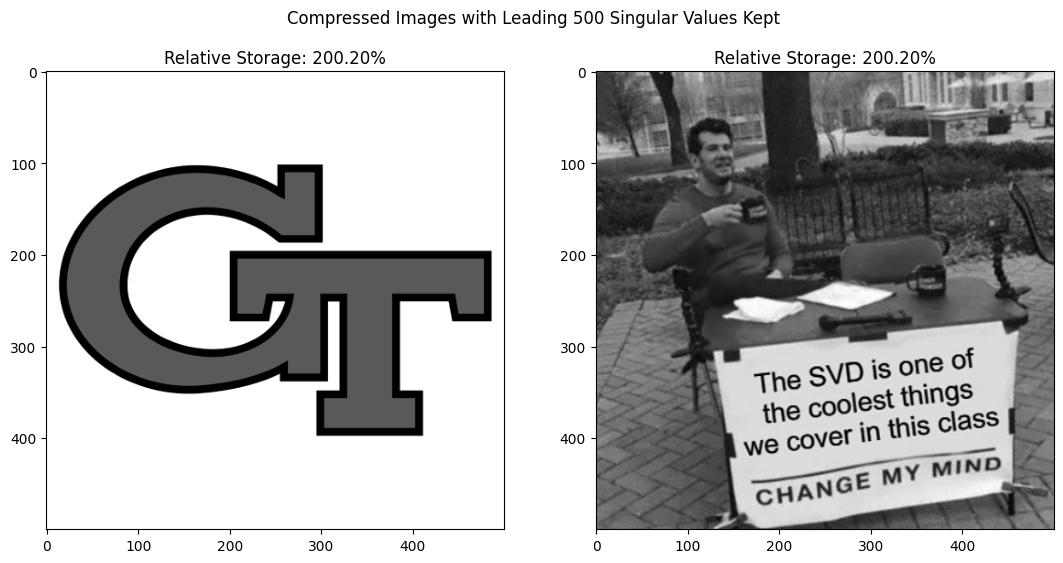

In [36]:
# Defining a function to compute how much space a singular value decomposition takes up 
def total_entries_stored(U, S, V):
    return (U.shape[0] * U.shape[1]) + S.shape[0] + (V.shape[0] * V.shape[1])

# Adjust this between 1-500 to determine how many leading singular values to keep in our reconstruction of the image
k = 500


plt.figure(figsize=(13,6))
plt.suptitle(f"Compressed Images with Leading {k} Singular Values Kept")

# FIRST IMAGE
# Only keeping the first k left singular vectors, singular values, and right singular vectors
Uk1, Sk1, Vk1 = U1[:,:k], S1[:k,:k], V1[:,:k]

plt.subplot(1,2,1)
# Computing the ratio between the truncated SVD's storage vs. the original image's storage
plt.title(f"Relative Storage: {100 * total_entries_stored(Uk1, Sk1, Vk1) / image1.shape[0]**2:.2f}%")
plt.imshow(Uk1 @ Sk1 @ Vk1.T, cmap='gray')

# SECOND IMAGE
# Only keeping the first k left singular vectors, singular values, and right singular vectors
Uk2, Sk2, Vk2 = U2[:,:k], S2[:k,:k], V2[:,:k]

plt.subplot(1,2,2)
# Computing the ratio between the truncated SVD's storage vs. the original image's storage
plt.title(f"Relative Storage: {100 * total_entries_stored(Uk2, Sk2, Vk2) / image1.shape[0]**2:.2f}%")
plt.imshow(Uk2 @ Sk2 @ Vk2.T, cmap='gray')

# Verifying Relation Between Reconstruction Error and Matrix Norms 

$$ \text{We consider some } A \in \mathbb{R}^{N \times N} \text{. Recall the following definitions:} $$ 

$$ \text{Norms: } \hspace{12pt} ||A||_F = \sqrt{\sum_{i=1}^N \sum_{j=1}^N |a_{ij}|^2 } \hspace{24pt} ||A||_2 = \max \frac{||Ax||_2}{||x||_2}$$ 

$$ \text{SVD: } \hspace{12pt} A = U \Sigma V^\top = \sum_{i=1}^N \sigma_i u_i v_i^\top \hspace{24pt} \tilde{A}_K = \sum_{i=1}^K \sigma_i u_i v_i^\top \hspace{12pt} K < N $$  

$$ \text{F. Norm in Terms of Singular Values: } \hspace{12pt} ||A||_F = \sqrt{\sum_{i=1}^N \sigma_i^2} \hspace{24pt} ||\tilde{A}_K ||_F = \sqrt{\sum_{i=1}^K \sigma_i^2} $$ 

$$ \text{2-Norm in Terms of Singular Values: } \hspace{12pt} ||A||_2 = \sigma_1 \hspace{12pt} ||\tilde{A}_{K} ||_2 = \sigma_1 $$ 

$$ \text{Reconstruction-Error: } \hspace{12pt} ||A - \tilde{A}_K||_F = \sqrt{\sum_{i=K+1}^N \sigma_i^2 } \hspace{24pt} ||A - \tilde{A}_K||_2 = \sigma_{k+1} $$ 



In [34]:
# Verifying Frobenius-Norm Reconstruction Error 
print("Frobenius norm of (Original - Compressed Image):         %.5f" % np.linalg.norm(image1 - Uk1 @ Sk1 @ Vk1.T, 'fro'))
print("Sqrt of sum of k+1 through N squared singular values:    %.5f\n" % np.sqrt(np.sum((np.diag(S1)[k:])**2)))

# Verifying 2-norm Reconstruction Error 
print("2-Norm of (Original - Compressed Image):                 %.5f" % np.linalg.norm(image1 - Uk1 @ Sk1 @ Vk1.T, 2))
print("(k+1)th singular value:                                  %.5f" % S1[k,k])

Frobenius norm of (Original - Compressed Image):         0.72827
Sqrt of sum of k+1 through N squared singular values:    0.72828

2-Norm of (Original - Compressed Image):                 0.18518
(k+1)th singular value:                                  0.18518


# Visualizing the Left Singular Vectors

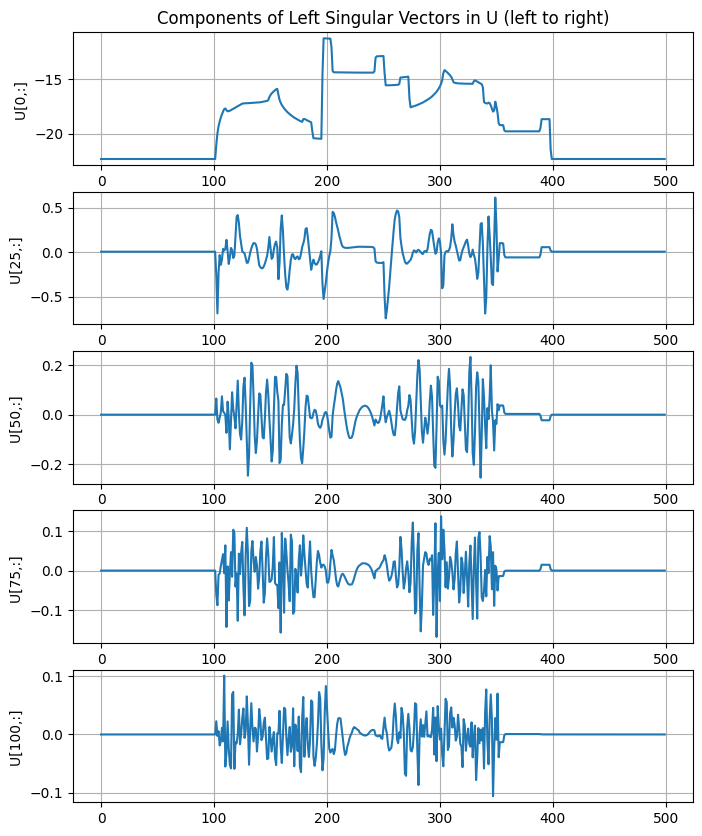

In [ ]:
plt.figure(figsize=(8,10))

# Determining how many indices to skip
multiplier = 25

# Creating five separate plots for 5 different right singular vectors
for i in range(5):
    plt.subplot(5,1,i+1) 
    if i == 0: 
        plt.title("Components of Left Singular Vectors in U (left to right)")

    # Plot a right singular vector scaled by its corresponding singular value 
    plt.plot(range(U1.shape[0]), U1[:,i*multiplier]*S1[i*multiplier, i*multiplier])
    plt.grid()
    plt.ylabel(f"U[{i*multiplier},:] ")

